# Predict Last two weeks
In Model-selection.ipynb you can see that XGBoost performs orders of magnitudes better then the other models. However it has already seen the test data. I have the suspicion that it is just overfitted to that data. To control for that we are going to perform a timebased CV.

In [15]:
# Imports
import pandas as pd
df = pd.read_csv("../data/finalData2.csv")
df['time'] = pd.to_datetime(df['time'])
df.drop(["Unnamed: 0",'oerlikon'],axis = 1  ,inplace=True)
stop = df['time'].iloc[-1]
start = stop - pd.Timedelta(weeks=5)
timemask = (df['time'] >= start) & (df['time'] <= stop)
time = df['time']
df.drop('time', axis = 1, inplace = True)
X_train = df[timemask == 0].drop('city', axis = 1)
y_train = df[timemask == 0]['city']
X_test = df[timemask].drop('city', axis = 1)
y_test = df[timemask]['city']
from sklearn.metrics import mean_squared_error as mse

# XGBoost - All features


In [9]:
import xgboost as xgb
reg = xgb.XGBRegressor()
reg.fit(X_train, y_train)
xgb_preds = reg.predict(X_test)

XGBoost - Uncorrelated features for shap analysis


In [11]:
reg_uncor = xgb.XGBRegressor()
df_uncor = pd.read_csv("../data/uncor_features.csv")
X_train_uncor = df_uncor[timemask == 0].drop('city', axis = 1)
y_train_uncor = df_uncor[timemask == 0]['city']
X_test_uncor = df_uncor[timemask].drop('city', axis = 1)
y_test_uncor = df_uncor[timemask]['city']
reg_uncor.fit(X_train_uncor, y_train_uncor)
xgb_preds_uncor = reg_uncor.predict(X_test_uncor)

# Visualize


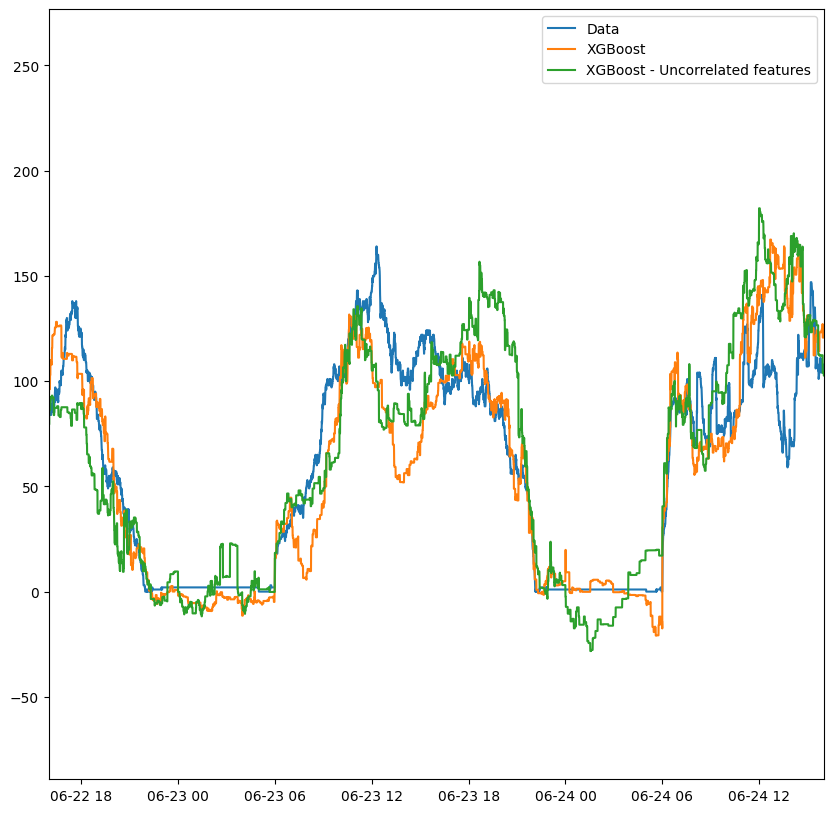

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.plot(time[timemask], y_test, label = "Data")
plt.plot(time[timemask], xgb_preds, label = "XGBoost")
plt.plot(time[timemask], xgb_preds_uncor, label = "XGBoost - Uncorrelated features")
plt.xlim([start + pd.Timedelta(days=30),start + pd.Timedelta(days=32)])
plt.legend()

In [19]:
print(f"Mean squared error uncorrelated: {mse(y_test, xgb_preds_uncor):5}")
print(f"Mean squared error all features: {mse(y_test, xgb_preds):5}")

Mean squared error uncorrelated: 953.8383002849943
Mean squared error all features: 607.9407540733616


# Shap analysis

In [21]:
import shap
explainer = shap.TreeExplainer(reg_uncor)
shap_values = explainer.shap_values(X_test_uncor)

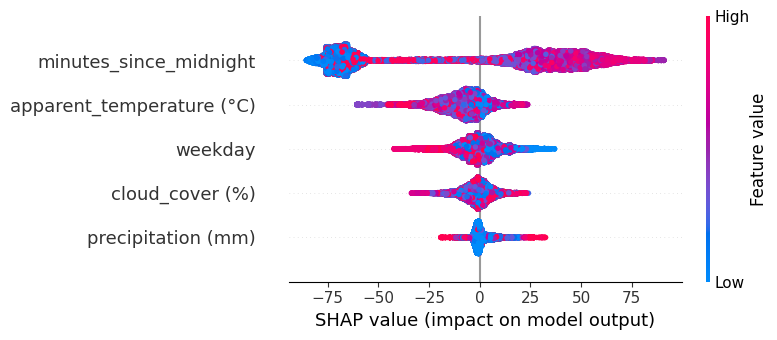

In [22]:
shap.summary_plot(shap_values, X_test_uncor)

In [ ]:
plt.scatter("X_test_uncor",)

# Feature importances - uncorelated features

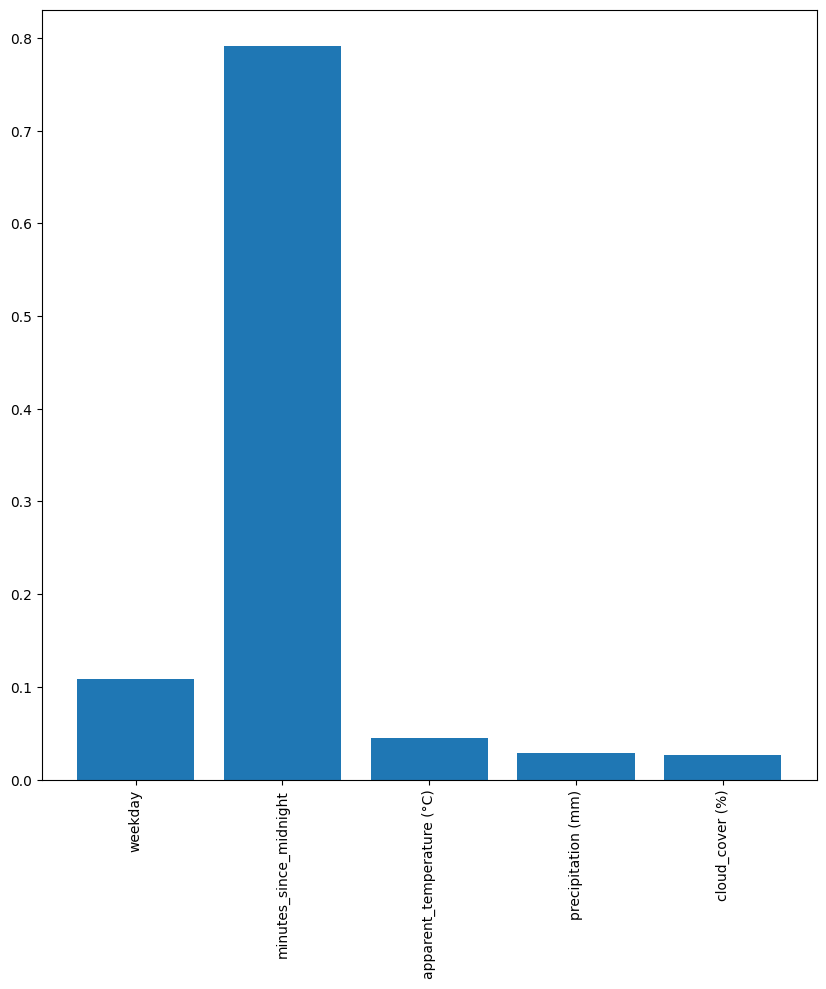

In [33]:
plt.figure(figsize=(10,10))
plt.bar(X_test_uncor.columns ,reg_uncor.feature_importances_)
plt.xticks(rotation = 90)
plt.show()

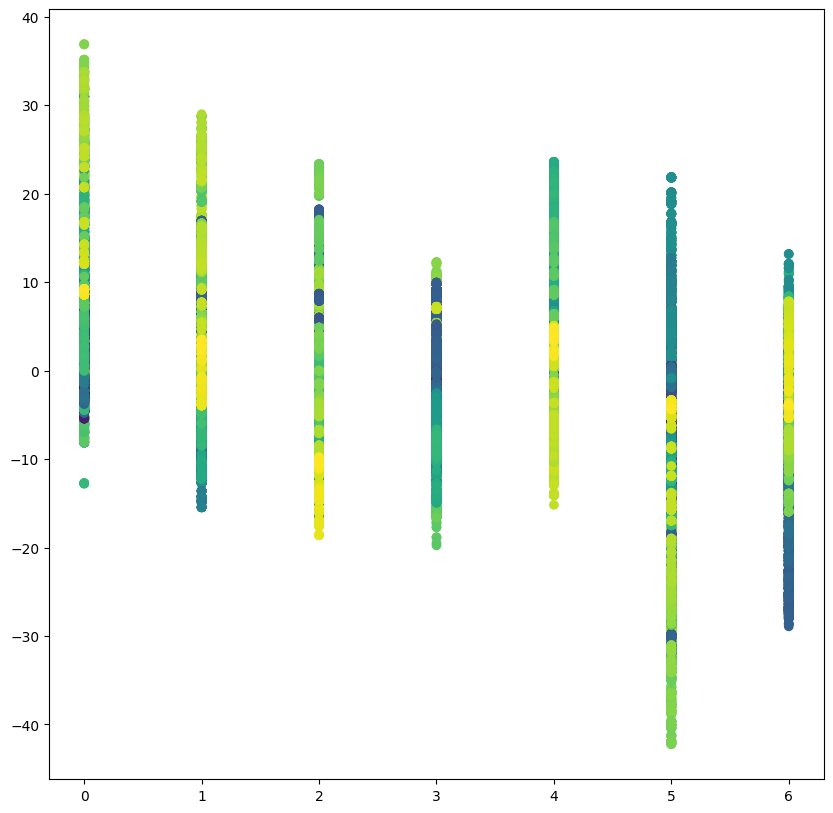

In [53]:
plt.figure(figsize=(10,10))
plt.scatter(x = X_test_uncor['weekday'], y = shap_values[:,0], c = X_test_uncor['minutes_since_midnight'])
plt.show()